# Predicting Health Insurance Utilization Using Supervised Learning

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
#Load Dataset
data = pd.read_csv("healthcare_data.csv")

In [3]:
data.head()

,Timestamp,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Health_Insurance,Insurance_Cover,Last_Hospital_Visit_Months,Had_Insurance_Last_Visit,Had_Routine_Checkup,Routine_Checkup_Period_Years,Had_Cancer_Screening,Cancer_Screening_Period_Years,GeoCode,GeoAddress
0,2024-05-14 10:09:43,18-30,Male,Single,0.0,Student,Less than 10000,Yes,AMACO,NaN,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,2024-05-14 10:16:53,18-30,Male,Single,0.0,Student,10001-20000,No,NaN,10.0,No,No,NaN,No,NaN,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya"
2,2024-05-14 10:21:34,18-30,Male,Single,0.0,Unemployed,Less than 10000,No,NaN,NaN,No,No,NaN,No,NaN,"-0.7284222,37.1501468","C71, Kenya"
3,2024-05-14 10:27:40,18-30,Male,Single,0.0,Unemployed,Less than 10000,No,NaN,NaN,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,2024-05-14 10:34:20,18-30,Male,Single,0.0,Student,Less than 10000,No,NaN,NaN,No,No,NaN,No,NaN,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya"


In [4]:
data.describe()

,Children,Last_Hospital_Visit_Months
count,3628.000000,989.000000
mean,1.874587,5.901921
std,1.992122,8.478926
min,0.000000,0.000000
25%,0.000000,2.000000
50%,2.000000,4.000000
75%,3.000000,6.000000
max,12.000000,120.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      3628 non-null   object 
 1   Age                            3628 non-null   object 
 2   Gender                         3628 non-null   object 
 3   Marital_Status                 3628 non-null   object 
 4   Children                       3628 non-null   float64
 5   Employment_Status              3628 non-null   object 
 6   Monthly_Income                 3628 non-null   object 
 7   Had_Health_Insurance           3628 non-null   object 
 8   Insurance_Cover                1644 non-null   object 
 9   Last_Hospital_Visit_Months     989 non-null    float64
 10  Had_Insurance_Last_Visit       3628 non-null   object 
 11  Had_Routine_Checkup            3628 non-null   object 
 12  Routine_Checkup_Period_Years   1200 non-null   o

In [6]:
data.shape

(3628, 17)

In [7]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Marital_Status', 'Children',
       'Employment_Status', 'Monthly_Income', 'Had_Health_Insurance',
       'Insurance_Cover', 'Last_Hospital_Visit_Months',
       'Had_Insurance_Last_Visit', 'Had_Routine_Checkup',
       'Routine_Checkup_Period_Years', 'Had_Cancer_Screening',
       'Cancer_Screening_Period_Years', 'GeoCode', 'GeoAddress'],
      dtype='object')

In [8]:
# Check for missing values
print(data.isnull().sum())

Timestamp                           0
Age                                 0
Gender                              0
Marital_Status                      0
Children                            0
Employment_Status                   0
Monthly_Income                      0
Had_Health_Insurance                0
Insurance_Cover                  1984
Last_Hospital_Visit_Months       2639
Had_Insurance_Last_Visit            0
Had_Routine_Checkup                 0
Routine_Checkup_Period_Years     2428
Had_Cancer_Screening                0
Cancer_Screening_Period_Years    2727
GeoCode                             0
GeoAddress                          0
dtype: int64


Data Cleaning and Future Engineering

In [9]:
#Drop Irrelevant Columns
drop_cols = ['Timestamp', 'GeoCode', 'GeoAddress']
data = data.drop(columns=drop_cols, errors='ignore')

In [10]:
#Handle Missing Values (Drop columns with excessive missing data)
data = data.drop(columns=['Insurance_Cover', 'Last_Hospital_Visit_Months', 'Routine_Checkup_Period_Years', 'Cancer_Screening_Period_Years' ], errors='ignore')

In [11]:
data.describe()

,Children
count,3628.000000
mean,1.874587
std,1.992122
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,12.000000


In [12]:
data.isnull().sum()

Age                         0
Gender                      0
Marital_Status              0
Children                    0
Employment_Status           0
Monthly_Income              0
Had_Health_Insurance        0
Had_Insurance_Last_Visit    0
Had_Routine_Checkup         0
Had_Cancer_Screening        0
dtype: int64

In [13]:
data.columns

Index(['Age', 'Gender', 'Marital_Status', 'Children', 'Employment_Status',
       'Monthly_Income', 'Had_Health_Insurance', 'Had_Insurance_Last_Visit',
       'Had_Routine_Checkup', 'Had_Cancer_Screening'],
      dtype='object')

In [14]:
#Encode Categorical Features
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [15]:
#Normalize Features
X_full = data.drop(columns=['Had_Health_Insurance', 'Had_Routine_Checkup'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)


In [16]:
X_full.head()

,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Insurance_Last_Visit,Had_Cancer_Screening
0,0,1,2,0.0,2,5,0,0
1,0,1,2,0.0,2,0,0,0
2,0,1,2,0.0,3,5,0,0
3,0,1,2,0.0,3,5,0,0
4,0,1,2,0.0,2,5,0,0


In [17]:
#Define Targets
X = pd.DataFrame(X_scaled, columns=X_full.columns)
y_insurance = data['Had_Health_Insurance']
y_checkup = data['Had_Routine_Checkup']

In [18]:
#Train/Test Split
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y_insurance, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_checkup, test_size=0.2, random_state=42)


Exploratory Data Analysis (EDA)

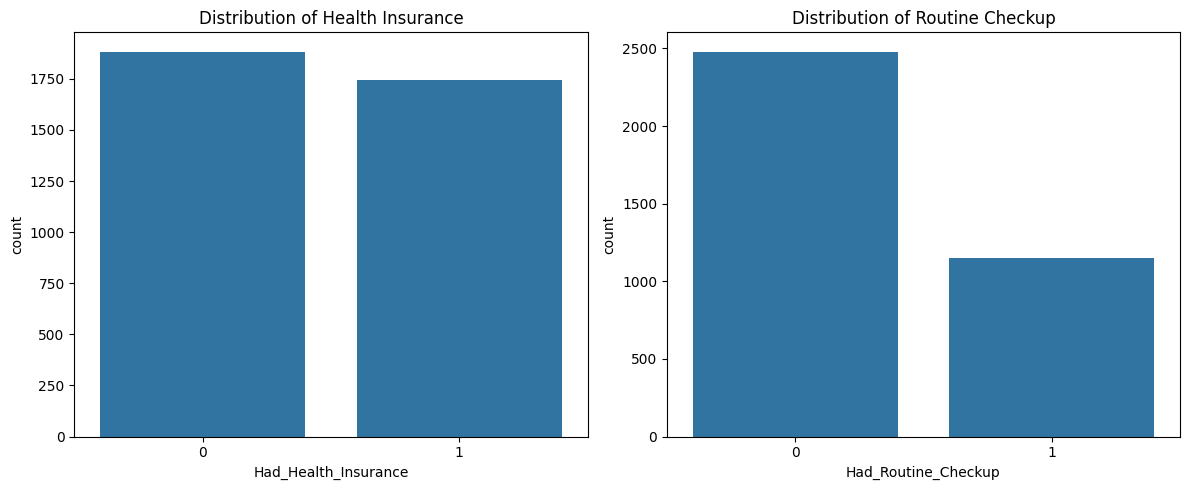

In [19]:
#Target Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Had_Health_Insurance', data=data, ax=axes[0])
axes[0].set_title('Distribution of Health Insurance')
sns.countplot(x='Had_Routine_Checkup', data=data, ax=axes[1])
axes[1].set_title('Distribution of Routine Checkup')
plt.tight_layout()
plt.show()

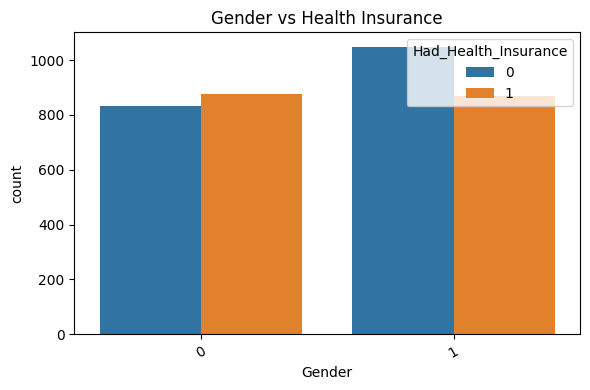

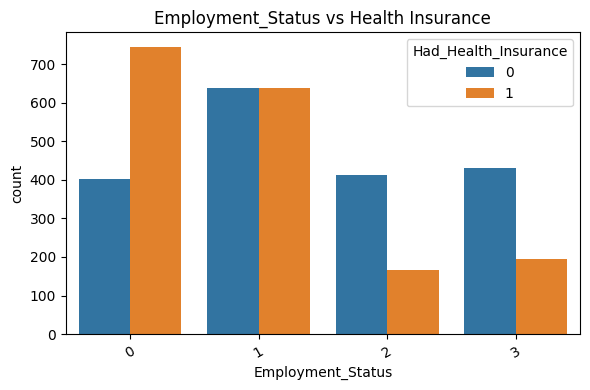

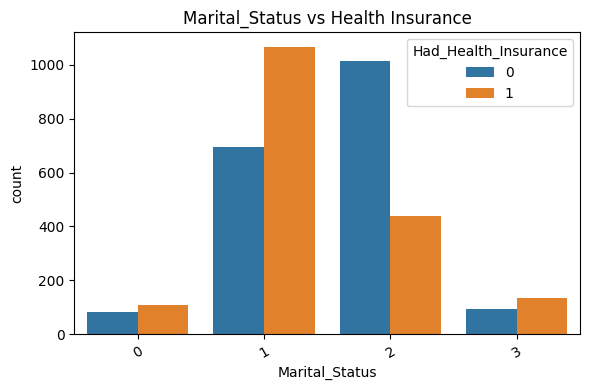

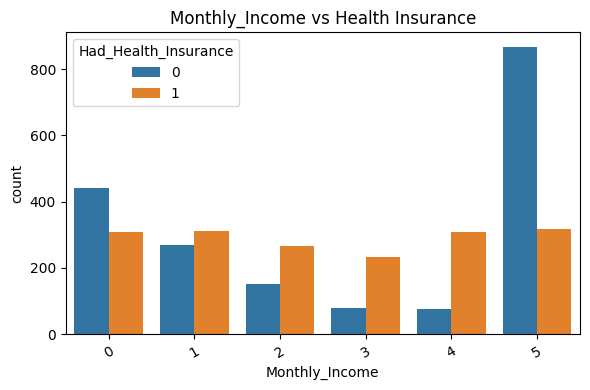

In [20]:
#Categorical Feature Distributions by Target
categorical_features = ['Gender', 'Employment_Status', 'Marital_Status', 'Monthly_Income']
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Had_Health_Insurance', data=data)
    plt.title(f'{col} vs Health Insurance')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

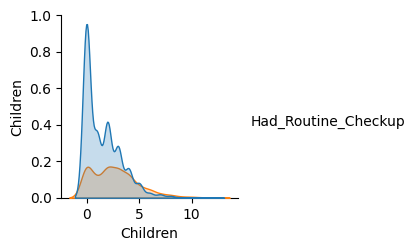

In [21]:
#Pairplot / Violin Plot
sns.pairplot(data=data, vars=['Children'], hue='Had_Routine_Checkup')
plt.show()

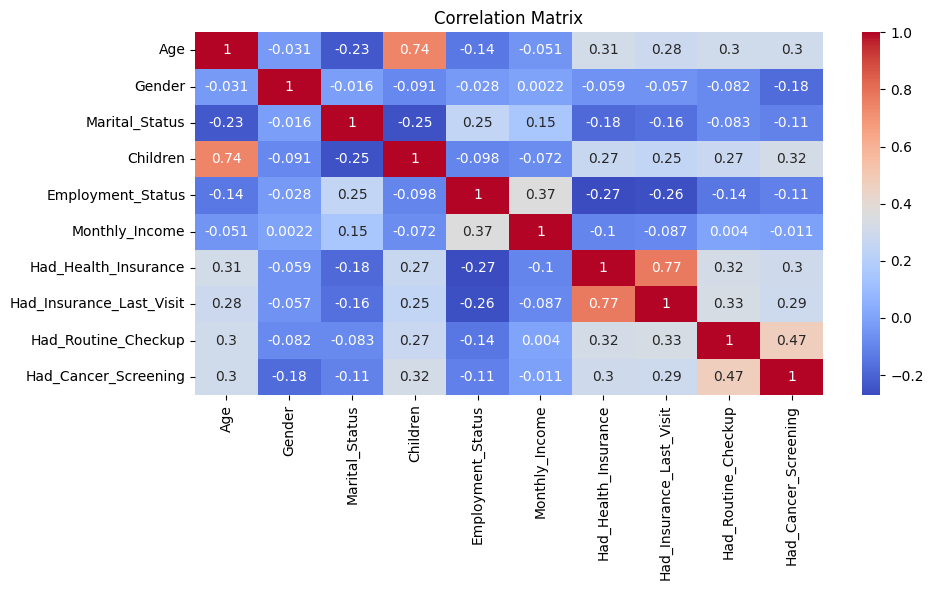

In [22]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

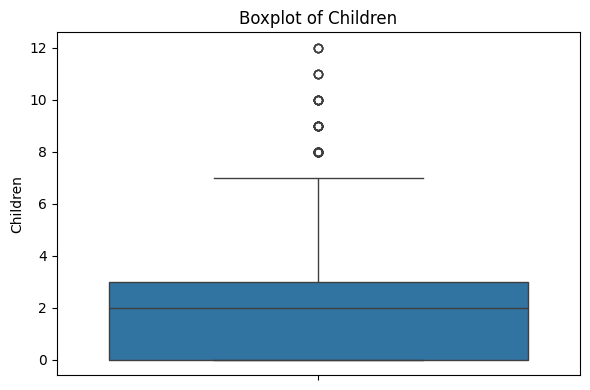

In [23]:
#Boxplots for Outlier Detection
numerical_features = ['Children']
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [24]:
#Initialize Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

In [25]:
#Train and Evaluate Models for Insurance Prediction
print("--- Health Insurance Prediction ---")
for name, model in models.items():
    model.fit(X_train_i, y_train_i)
    preds = model.predict(X_test_i)
    print(f"\n{name}")
    # Evaluation: Comparing multiple models using common metrics
    print("Accuracy:", accuracy_score(y_test_i, preds))
    print("Precision:", precision_score(y_test_i, preds))
    print("Recall:", recall_score(y_test_i, preds))
    print("F1-Score:", f1_score(y_test_i, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test_i, preds))


--- Health Insurance Prediction ---

Logistic Regression
Accuracy: 0.8787878787878788
Precision: 0.946236559139785
Recall: 0.7833827893175074
F1-Score: 0.8571428571428571
Confusion Matrix:
 [[374  15]
 [ 73 264]]

Random Forest
Accuracy: 0.8553719008264463
Precision: 0.881578947368421
Recall: 0.7952522255192879
F1-Score: 0.8361934477379095
Confusion Matrix:
 [[353  36]
 [ 69 268]]

KNN
Accuracy: 0.8581267217630854
Precision: 0.8774193548387097
Recall: 0.8071216617210683
F1-Score: 0.8408037094281299
Confusion Matrix:
 [[351  38]
 [ 65 272]]


In [26]:
#Train and Evaluate Models for Routine Checkup Prediction
print("\n--- Routine Checkup Prediction ---")
for name, model in models.items():
    model.fit(X_train_c, y_train_c)
    preds = model.predict(X_test_c)
    print(f"\n{name}")
    # Evaluation: Comparing multiple models using common metrics
    print("Accuracy:", accuracy_score(y_test_c, preds))
    print("Precision:", precision_score(y_test_c, preds))
    print("Recall:", recall_score(y_test_c, preds))
    print("F1-Score:", f1_score(y_test_c, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test_c, preds))


--- Routine Checkup Prediction ---

Logistic Regression
Accuracy: 0.790633608815427
Precision: 0.7672955974842768
Recall: 0.5147679324894515
F1-Score: 0.6161616161616161
Confusion Matrix:
 [[452  37]
 [115 122]]

Random Forest
Accuracy: 0.7575757575757576
Precision: 0.6502463054187192
Recall: 0.5569620253164557
F1-Score: 0.6
Confusion Matrix:
 [[418  71]
 [105 132]]

KNN
Accuracy: 0.743801652892562
Precision: 0.6335078534031413
Recall: 0.510548523206751
F1-Score: 0.5654205607476636
Confusion Matrix:
 [[419  70]
 [116 121]]


I evaluated three models. For both health insurance and routine checkup prediction, Logistic Regression gave the highest overall F1-score and accuracy. This means it's likely the most reliable model for deployment. However, recall for routine checkups is lower across all models, so future work could involve improving feature quality or using ensemble tuning.

Deployment using Streamlit

In [27]:
!pip install streamlit


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import joblib

In [29]:
# Fit on the full training set
deployment_model = LogisticRegression(max_iter=1000)
deployment_model.fit(X_train_i, y_train_i)

LogisticRegression(max_iter=1000)

In [30]:
# Save the model and scaler
joblib.dump(deployment_model, 'insurance_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
print("Deployment model and artifacts saved. You can now load them in a Streamlit app.")



Deployment model and artifacts saved. You can now load them in a Streamlit app.


In [31]:
#Save the Best Model and Scaler for Deployment
import joblib
# Save the best model (Logistic Regression for insurance)
joblib.dump(models['Logistic Regression'], 'logistic_model_insurance.pkl')
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
# Save encoders (optional - for use during prediction)
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']